## Importing libraries

In [637]:
# https://www.codegrepper.com/code-examples/python/pandas+disable+warnings (for the report)
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading files and data manipulation

### Reading and cleaning the females dataset

In [638]:
# reading and cleaning the females dataset
females = pd.read_json('females.json')

# https://stackoverflow.com/questions/62343093/remove-empty-string-from-a-list-of-strings
females['prompts_replied'] = [len(list(filter(None, sublist))) for sublist in females['prompts']]
females = females.drop(['id', 'prompts'], 1)

females['gender'] = 'Female'

females['bio_length'] = females['bio'].str.split('').str.len()
females['bio_length'] = females['bio_length'].replace('', 0).astype('int')
females['bio_length'][females.bio_length == 2] = 0

females.head()

,gender,bio,interests,anthem,prompts_replied,bio_length
0,Female,Instagram- leonor_ortizzz,"[Coffee, Activism, Foodie, Music, Movies]",,0,27
1,Female,"lover of avocados, coconuts, and one too many ...","[Fashion, Karaoke, Museum, Brunch, Volunteering]",Hip Hop/Rap,1,60
2,Female,mommy issue haver costco hotdog enthusiast goo...,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Hip Hop/Rap,3,63
3,Female,Follow my new insta page: angelisse_req Im 18 ...,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",Indie,0,75
4,Female,"they/she. from bushwick, and 420 friendly. :) ...","[Photography, Black Lives Matter, Movies, Musi...",Pop,2,112


### Reading and cleaning the males dataset

In [639]:
males = pd.read_json('males.json')

# https://stackoverflow.com/questions/62343093/remove-empty-string-from-a-list-of-strings
males['prompts_replied'] = [len(list(filter(None, sublist))) for sublist in males['prompts']]

males = males.drop(['id', 'prompts'], 1)

males['gender'] = 'Male'

males['bio_length'] = males['bio'].str.split('').str.len()
males['bio_length'] = males['bio_length'].replace('', 0).astype('int')

males['bio_length'][males.bio_length == 2] = 0

males.head()

,gender,bio,interests,anthem,prompts_replied,bio_length
0,Male,Jmu baseball 26 Don Bosco Prep 22,[Working out],,0,36
1,Male,,"[Outdoors, Netflix, Comedy, Hiking]",,0,0
2,Male,,"[Movies, Tattoos, Working out, Music, Sports]",,3,0
3,Male,I workout in the morning so the rest of the da...,"[Travel, Music, Working out]",Hip Hop/Rap,0,114
4,Male,,[Coffee],,0,0


### Combining both dataframes, and further cleaning

In [640]:
# joining male and female datasets
profiles = females.append(males)
profiles = profiles.replace('',np.nan)

profiles['num_interests'] = profiles['interests'].str.len()
profiles['num_interests'] = profiles['num_interests'].replace(np.nan, 0)
profiles['num_interests'] = profiles['num_interests'].astype('int')

profiles

,gender,bio,interests,anthem,prompts_replied,bio_length,num_interests
0,Female,Instagram- leonor_ortizzz,"[Coffee, Activism, Foodie, Music, Movies]",NaN,0,27,5
1,Female,"lover of avocados, coconuts, and one too many ...","[Fashion, Karaoke, Museum, Brunch, Volunteering]",Hip Hop/Rap,1,60,5
2,Female,mommy issue haver costco hotdog enthusiast goo...,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Hip Hop/Rap,3,63,5
3,Female,Follow my new insta page: angelisse_req Im 18 ...,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",Indie,0,75,5
4,Female,"they/she. from bushwick, and 420 friendly. :) ...","[Photography, Black Lives Matter, Movies, Musi...",Pop,2,112,5
...,...,...,...,...,...,...,...
45,Male,NaN,"[Reading, Sports, Movies]",NaN,0,0,3
46,Male,NaN,"[Surfing, Tattoos, Stocks, Yoga, Ramen]",NaN,3,0,5
47,Male,Best Dad in the world,"[Netflix, Travel, Hiking, Fishing]",NaN,0,23,4
48,Male,Chubby Dude lifting Chubby Weights Seeking: -V...,"[Mental Heath Awareness, Working out, Dungeons...",Country,2,330,5


We ultimately chose to clean both male and female datasets seperately and then join them afterwards because when we realized that our data was already naturally faceted by gender, it was a lot easier for us to make conclusions based on the datasets seperately, as well as with them merged together as well. 

## Ascertaining information about most common interests

In [641]:
from collections import Counter

def getMostCommonInterest(df):
    '''finding the most common interest for both genders'''
    interests = []
    for profile_interest_list in df.interests:
        interests += profile_interest_list
    c = Counter(interests)
    return c.most_common(5)

def generatePie(df):
    '''reusing code to plot a pie chart with a given dataframe and burst tuple for effects'''
    plot = getMostCommonInterest(df)
    ndf = pd.DataFrame(plot, columns=['Interest', 'Frequency'])

    plt.pie(ndf['Frequency'],labels=ndf['Interest'], explode=(0.1, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()


### Plotting top 5 most common interests among female profiles

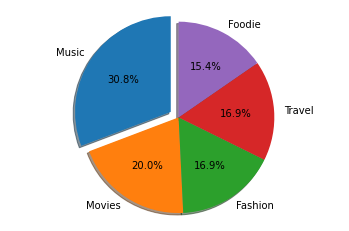

In [642]:
generatePie(females)


### Plotting top 5 most common interests among male profiles

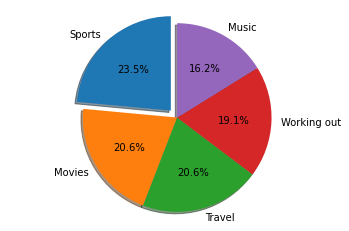

In [643]:
generatePie(males)

### Plotting top 5 most common interests among all profiles

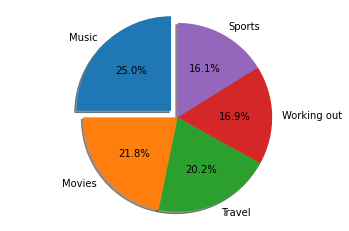

In [644]:
generatePie(profiles)

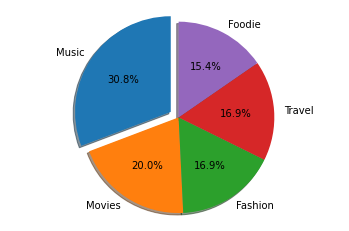

In [645]:
generatePie(females)

## Ascertaining information about those who chose to fill out the optional prompts

### For males

In [646]:
'''We want to show the count of people with 3, 2, 1, and 0 answers, and then graph them'''
males.prompts_replied.value_counts()

0    31
3     8
2     7
1     4
Name: prompts_replied, dtype: int64

<AxesSubplot:>

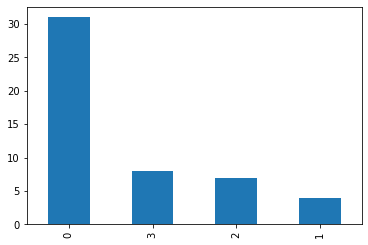

In [647]:
'''and then plot them (neaten it up)'''
males['prompts_replied'].value_counts().plot(kind='bar')

### For females

In [648]:
'''We want to show the count of people with 3, 2, 1, and 0 answers, and then graph them'''
females.prompts_replied.value_counts()

0    23
2    10
3     9
1     8
Name: prompts_replied, dtype: int64

<AxesSubplot:>

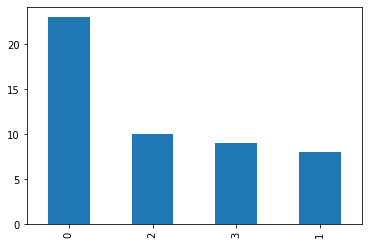

In [649]:
'''and then plot them (neaten it up)'''
females['prompts_replied'].value_counts().plot(kind='bar')

### For both male and females combined

In [650]:
'''We want to show the count of people with 3, 2, 1, and 0 answers, and then graph them'''
profiles.prompts_replied.value_counts()

0    54
3    17
2    17
1    12
Name: prompts_replied, dtype: int64

<AxesSubplot:>

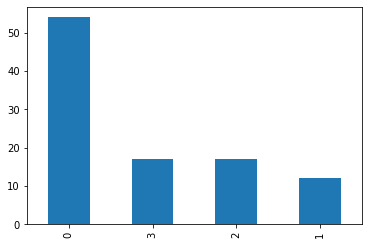

In [651]:
'''and then plot them (neaten it up)'''
profiles['prompts_replied'].value_counts().plot(kind='bar')

## Ascertaining information about bio length

### The average bio length for a female profile based on our dataframe

In [652]:
females.bio_length.mean()

53.2

### The average bio length for a male profile based on our dataframe

In [653]:
males.bio_length.mean()

49.32

### The average bio length for any profile based on our dataframe

In [654]:
profiles.bio_length.mean()

51.26

### Outliers (i): - largest bio length in the collection -

In [655]:
# get largest bio length
profiles.bio_length.max()

330

#### Outliers (i): - Who is our outlier? -

In [656]:
profiles[profiles.bio_length == profiles.bio_length.max()]

,gender,bio,interests,anthem,prompts_replied,bio_length,num_interests
48,Male,Chubby Dude lifting Chubby Weights Seeking: -V...,"[Mental Heath Awareness, Working out, Dungeons...",Country,2,330,5


#### Outliers (i): - smallest bio length in the collection -

In [657]:
# get smallest bio length
profiles.bio_length.min()

0

#### Outliers (ii): - Who is our outlier? -

Well, we have had many profiles end up being 0, so we're going to go further into it and find out who is more likely to have an empty bio.

In [658]:
profiles[profiles.bio_length == 0]

,gender,bio,interests,anthem,prompts_replied,bio_length,num_interests
7,Female,NaN,"[Sports, Dog lover, Athlete, Working out, Movies]",Indie,0,0,5
11,Female,NaN,"[Walking, Travel, Movies, Coffee, Netflix]",Pop,3,0,5
16,Female,NaN,"[Mental Health Awareness, Coffee, Working out,...",NaN,0,0,5
20,Female,NaN,"[Cat lover, Second-hand apparel, Climate Chang...",Pop,0,0,5
23,Female,NaN,"[Working out, Spirituality, Astrology, Languag...",NaN,1,0,5
26,Female,NaN,[],R&B,0,0,0
28,Female,NaN,"[Grab a drink, Working out, Dog lover]",NaN,0,0,3
31,Female,NaN,[Fashion],NaN,1,0,1
35,Female,NaN,"[Baking, Fashion, Cooking, Art, Music]",Hip Hop/Rap,0,0,5
39,Female,NaN,"[Art, Dog lover, Voter Rights]",Indie,0,0,3


As we can see, there are a lot of empty biographies here. Let's go further into this.

#### Outliers (ii): - How many males have empty bios? -

In [659]:
len(males[males.bio_length == 0])

19

#### Outliers (ii): - How many females have empty bios? -

In [660]:
len(females[females.bio_length == 0])

11

Therefore, we have 30/100 of these profiles that did not provide a bio, with 19/50 males, and 11/50 females not providing. Meaning that in our sample size, males are 16% less likely to include a bio than females.

#### Outliers (ii): - Let's take a look -

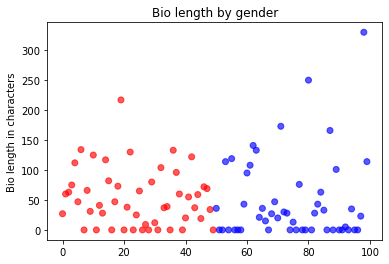

In [661]:
y=list(range(len(profiles.index)))
colors = {'Male': 'blue', 'Female': 'red'}
plt.title('Bio length by gender')
plt.ylabel('Bio length in characters')
plt.scatter(y, profiles['bio_length'], c=profiles['gender'].map(colors), alpha=0.65)

#### Outliers (ii): - Revisiting outliers -

Very few profiles seem to have bio lengths over 150; let's take a look at them.

In [662]:
profiles[profiles['bio_length'] >= 150]

,gender,bio,interests,anthem,prompts_replied,bio_length,num_interests
19,Female,Mentally in NYC...I'm from and live in Panama ...,"[Astrology, Movies, Music, Netflix, Writer]",Musical,3,217,5
21,Male,The only difference between me and dave Chappe...,[],Country,0,173,0
30,Male,"If you love nature and going on adventures, bu...","[Museum, Black Lives Matter, Travel, Feminism]",Hip Hop/Rap,2,250,4
37,Male,Currently a junior studying food science at MS...,"[Movies, Tattoos, Hiking, Travel, Ice Cream]",Dubstep,2,166,5
48,Male,Chubby Dude lifting Chubby Weights Seeking: -V...,"[Mental Heath Awareness, Working out, Dungeons...",Country,2,330,5


Surprisingly, 4 of the largest bio lengths in the entire set are males, though females seem to usually have more characters in their bios as a whole.

## Ascertaining information about favorite genres

In [663]:
# we are reusing this code used earlier to generate a pie chart, but this time we're making it work a bit differently for favorite genres
def generatePie2(df):
    '''reusing code to plot a pie chart with a given dataframe and burst tuple for effects'''
    plot = df.anthem.value_counts().head(3)
    ndf = pd.DataFrame(plot)
    ndf = ndf.reset_index()
    ndf.columns = ['Genre', 'Frequency']

    plt.pie(ndf['Frequency'],labels=ndf['Genre'], explode=(0.1, 0, 0), shadow=True, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()

### Females favorite genre based on our dataset

In [664]:
profiles.anthem.value_counts().head(3)

Hip Hop/Rap    19
Pop            19
Indie          13
Name: anthem, dtype: int64

#### Plotting the top 3 female genres

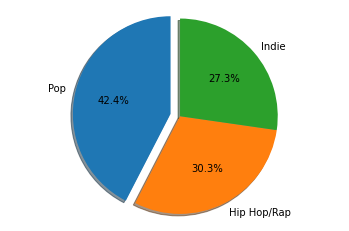

In [665]:
generatePie2(females)

### Males favorite genre based on our dataset

In [666]:
profiles.anthem.value_counts().head(3)

Hip Hop/Rap    19
Pop            19
Indie          13
Name: anthem, dtype: int64

#### Plotting the top 3 male genres

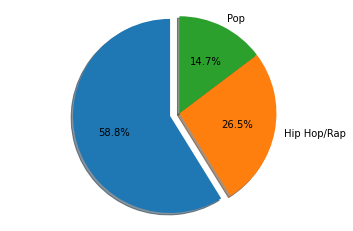

In [667]:
generatePie2(males)

### All profiles favorite genre based on our dataset

In [668]:
profiles.anthem.value_counts().head(3)

Hip Hop/Rap    19
Pop            19
Indie          13
Name: anthem, dtype: int64

#### Plotting the top 3 genres for all profiles

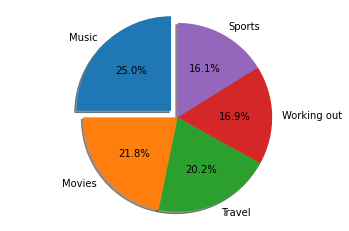

In [669]:
generatePie(profiles)